It is a code file for Traditional ML scenario 1. We have just considered participants with top 5 diseases which are around 2423 samples for analysis.

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set directory path
import os
os.chdir("/content/drive/My Drive/COMP-5800-YDK-2020_Group1/MergedData")

## Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
#Importing merged data file
data = pd.read_csv('HypertensionData.csv')

In [ ]:
data.shape

(2423, 374)

In [ ]:
data.head()

,SEQN,Target,RXQSEEN,RXDDAYS,DRUG_ALLOPURINOL,DRUG_ALPRAZOLAM,DRUG_AMITRIPTYLINE,DRUG_AMLODIPINE,DRUG_AMLODIPINE; BENAZEPRIL,DRUG_AMLODIPINE; HYDROCHLOROTHIAZIDE; OLMESARTAN,DRUG_AMLODIPINE; OLMESARTAN,DRUG_AMLODIPINE; VALSARTAN,DRUG_ANTIHYPERTENSIVE AGENTS - UNSPECIFIED,DRUG_ARIPIPRAZOLE,DRUG_ATENOLOL,DRUG_ATENOLOL; CHLORTHALIDONE,DRUG_ATORVASTATIN,DRUG_AZILSARTAN; CHLORTHALIDONE,DRUG_BENAZEPRIL,DRUG_BENAZEPRIL; HYDROCHLOROTHIAZIDE,DRUG_BENZTROPINE,DRUG_BISOPROLOL,DRUG_BUPROPION,DRUG_BUSPIRONE,DRUG_CANAGLIFLOZIN,DRUG_CANAGLIFLOZIN; METFORMIN,DRUG_CANDESARTAN,DRUG_CANDESARTAN; HYDROCHLOROTHIAZIDE,DRUG_CARVEDILOL,DRUG_CHLORDIAZEPOXIDE; CLIDINIUM,DRUG_CHLORTHALIDONE,DRUG_CHOLESTYRAMINE,DRUG_CITALOPRAM,DRUG_CLOMIPRAMINE,DRUG_CLONAZEPAM,DRUG_CLONIDINE,DRUG_COLESTIPOL,DRUG_DESVENLAFAXINE,DRUG_DEXLANSOPRAZOLE,DRUG_DILTIAZEM,...,LBXSTR,LBXSUA,URXVOL1,URDFLOW1,URDTIME1,URXVOL2,URDFLOW2,URDTIME2,URXVOL3,URDTIME3,URXPREG,LBXVIC,LBDVICLC,BPQ080,BPQ020,DIQ050,DIQ010,KIQ022,MCQ010,MCQ053,DPQ010,DPQ020,DPQ090,DPQ080,DPQ070,DPQ060,DPQ050,DPQ040,DPQ030,PAQ620,PAQ635,PAQ650,PAQ665,SLQ050,SLQ120,WHQ030,WHQ040,WHQ190,DLQ040,DLQ020
0,93705,1,1,5475,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.024155,0.349650,0.545055,0.022717,0.145299,0.139503,0.080122,0.432836,0.140000,0.261538,0.5,0.087716,0.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.0,2.0,2.0,1.0,2.0,5.397605e-79,1.0,3.0,2.0,2.0,2.0
1,93708,1,2,2555,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.016218,0.258741,0.032967,0.009434,0.019943,0.227991,0.161864,0.268657,0.332432,0.241026,0.8,0.102807,0.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.0,2.0,2.0,1.0,2.0,2.000000e+00,3.0,3.0,2.0,2.0,2.0
2,93709,1,1,365,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.036922,0.377622,0.024176,0.002019,0.071937,0.029345,0.018721,0.318408,0.243784,0.225641,1.0,0.027835,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,2.000000e-01,2.000000e-01,6.000000e-01,4.000000e-01,1.600000e+00,8.000000e-01,1.0,2.0,2.0,2.0,2.0,1.000000e+00,1.0,2.0,2.0,2.0,2.0
3,93714,0,1,4015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.031056,0.398601,0.334066,0.011698,0.173077,0.087133,0.072087,0.225871,0.135676,0.393162,0.9,0.053832,0.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.000000e+00,5.397605e-79,2.0,2.0,2.0,2.0,1.0,3.000000e+00,1.0,2.0,2.0,2.0,2.0
4,93715,0,1,4015,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.033816,0.307692,0.175824,0.012264,0.086182,0.144018,0.085759,0.389055,0.135676,0.393162,0.6,0.059182,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.000000e+00,3.000000e+00,1.0,1.0,1.0,2.0,1.0,4.000000e+00,3.0,3.0,2.0,1.0,1.0


In [ ]:
data['Target'].value_counts()

1    1646
0     777
Name: Target, dtype: int64

In [ ]:
# Store the accuracies for all the models.
df = pd.DataFrame(columns=['Model', 'Accuracy']);

## Removing Outliers

In [ ]:
from sklearn.ensemble import IsolationForest
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

clf = IsolationForest(max_samples=100, random_state=42)
output_outlier = pd.DataFrame(clf.fit_predict(data))
# data.drop(output_outlier.loc[output_outlier[0] == -1].index, inplace=True)
data['Target'].value_counts()

1    1646
0     777
Name: Target, dtype: int64

In [ ]:
output_outlier[output_outlier[0] == -1].index

Int64Index([341, 552, 1239, 1442, 1984, 2237], dtype='int64')

In [ ]:
data.iloc[[341, 552, 1239, 1442, 1984, 2237]]

,SEQN,Target,RXQSEEN,RXDDAYS,DRUG_ALLOPURINOL,DRUG_ALPRAZOLAM,DRUG_AMITRIPTYLINE,DRUG_AMLODIPINE,DRUG_AMLODIPINE; BENAZEPRIL,DRUG_AMLODIPINE; HYDROCHLOROTHIAZIDE; OLMESARTAN,DRUG_AMLODIPINE; OLMESARTAN,DRUG_AMLODIPINE; VALSARTAN,DRUG_ANTIHYPERTENSIVE AGENTS - UNSPECIFIED,DRUG_ARIPIPRAZOLE,DRUG_ATENOLOL,DRUG_ATENOLOL; CHLORTHALIDONE,DRUG_ATORVASTATIN,DRUG_AZILSARTAN; CHLORTHALIDONE,DRUG_BENAZEPRIL,DRUG_BENAZEPRIL; HYDROCHLOROTHIAZIDE,DRUG_BENZTROPINE,DRUG_BISOPROLOL,DRUG_BUPROPION,DRUG_BUSPIRONE,DRUG_CANAGLIFLOZIN,DRUG_CANAGLIFLOZIN; METFORMIN,DRUG_CANDESARTAN,DRUG_CANDESARTAN; HYDROCHLOROTHIAZIDE,DRUG_CARVEDILOL,DRUG_CHLORDIAZEPOXIDE; CLIDINIUM,DRUG_CHLORTHALIDONE,DRUG_CHOLESTYRAMINE,DRUG_CITALOPRAM,DRUG_CLOMIPRAMINE,DRUG_CLONAZEPAM,DRUG_CLONIDINE,DRUG_COLESTIPOL,DRUG_DESVENLAFAXINE,DRUG_DEXLANSOPRAZOLE,DRUG_DILTIAZEM,...,LBXSTR,LBXSUA,URXVOL1,URDFLOW1,URDTIME1,URXVOL2,URDFLOW2,URDTIME2,URXVOL3,URDTIME3,URXPREG,LBXVIC,LBDVICLC,BPQ080,BPQ020,DIQ050,DIQ010,KIQ022,MCQ010,MCQ053,DPQ010,DPQ020,DPQ090,DPQ080,DPQ070,DPQ060,DPQ050,DPQ040,DPQ030,PAQ620,PAQ635,PAQ650,PAQ665,SLQ050,SLQ120,WHQ030,WHQ040,WHQ190,DLQ040,DLQ020
341,94950,1,1,730,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0.012077,0.272727,0.501099,0.029264,0.103276,0.316930,0.188241,0.397015,0.445946,0.328205,0.5,0.146706,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.000000e+00,1.000000e+00,5.397605e-79,5.397605e-79,1.000000e+00,5.397605e-79,1.000000e+00,1.000000e+00,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0
552,95687,1,1,1460,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.015183,0.573427,0.419780,0.008604,0.297009,0.172460,0.117690,0.356219,0.254054,0.547009,1.0,0.063640,0.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,5.397605e-79,3.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.000000e+00,5.397605e-79,1.0,2.0,2.0,2.0,2.0,1.0,3.0,3.0,3.0,2.0,1.0,1.0
1239,98413,1,1,547,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0.081435,0.356643,0.523077,0.023887,0.132479,0.326411,0.223307,0.382090,0.422162,0.405128,1.0,0.045600,0.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,5.397605e-79,3.000000e+00,5.397605e-79,3.000000e+00,5.397605e-79,3.000000e+00,5.397605e-79,3.000000e+00,3.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0
1442,99200,1,1,4927,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0.024224,0.339860,0.230769,0.004811,0.291311,0.188262,0.067732,0.594030,0.207027,0.264957,1.0,0.077757,0.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,3.000000e+00,3.000000e+00,5.397605e-79,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,3.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,2.0,2.0,2.0,2.0
1984,101311,1,1,730,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.043133,0.384615,0.026374,0.000283,0.556980,0.158014,0.109592,0.305473,0.324865,0.282051,0.6,0.028795,0.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,3.000000e+00,3.0,2.0,1.0,1.0,1.0,1.0,4.0,3.0,2.0,2.0,2.0,2.0
2237,102281,1,1,730,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.037957,0.461538,0.065934,0.005151,0.076923,0.792325,0.207404,0.825871,0.463784,0.196581,0.8,0.080171,0.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.000000e+00,1.000000e+00,5.397605e-79,5.397605e-79,1.000000e+00,5.397605e-79,1.000000e+00,1.000000e+00,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0


In [ ]:
sorted(data)

Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

SEQN                4778.5
Target                 1.0
RXQSEEN                0.0
RXDDAYS             2920.0
DRUG_ALLOPURINOL       0.0
                     ...  
WHQ030                 2.0
WHQ040                 1.0
WHQ190                 0.0
DLQ040                 0.0
DLQ020                 0.0
Length: 374, dtype: float64


In [ ]:
ol = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

In [ ]:
(ol.sum(axis=1) > 35).value_counts()

False    2414
True        9
dtype: int64

In [ ]:
bl = (ol.sum(axis=1) > 35)

In [ ]:
bl[bl == True]

75      True
268     True
912     True
1239    True
1253    True
1424    True
1443    True
2151    True
2254    True
dtype: bool

## Train-Test Split with Stratified Sampling for Logistic Regression and Random Forest.

In [ ]:
X = data.drop('Target', axis = 1)
y = data['Target']

Logistic Regression is generally used for binary classification and a basic machine learning linear algorithm. After stratified sampling, we tried to get the results with logistic regression without applying any feature extraction or any other kind of cross validation.

In [ ]:
X_train_strata, X_test_strata, y_train_strata, y_test_strata = train_test_split(X , y, test_size=0.33, random_state=42, stratify = y)
lrmodel_strata = LogisticRegression(C = 0.01, max_iter = 2500)
lrmodel_strata.fit(X_train_strata, y_train_strata)
lrpred_strata = lrmodel_strata.predict(X_test_strata)

In [ ]:
df = df.append({'Model': 'Logistic with Stratified Sampling', 'Accuracy': accuracy_score(y_test_strata, lrpred_strata)}, ignore_index=True)

In [ ]:
accuracy_score(y_test_strata, lrpred_strata)

0.72375

In [ ]:
confusion_matrix(y_test_strata,lrpred_strata)

array([[ 84, 173],
       [ 48, 495]])

In [ ]:
print(classification_report(y_test_strata,lrpred_strata))

              precision    recall  f1-score   support

           0       0.64      0.33      0.43       257
           1       0.74      0.91      0.82       543

    accuracy                           0.72       800
   macro avg       0.69      0.62      0.62       800
weighted avg       0.71      0.72      0.69       800



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators = 150, max_depth = 50, oob_score = True)
# rfc = RandomForestClassifier()
rfc.fit(X_train_strata, y_train_strata)
rfc_pred = rfc.predict(X_test_strata)
accuracy_score(y_test_strata, rfc_pred)

0.935

In [ ]:
confusion_matrix(y_test_strata,rfc_pred)

array([[217,  40],
       [ 12, 531]])

In [ ]:
print(classification_report(y_test_strata,rfc_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       257
           1       0.93      0.98      0.95       543

    accuracy                           0.94       800
   macro avg       0.94      0.91      0.92       800
weighted avg       0.94      0.94      0.93       800



## Handling Class Imbalance with Random Upsampling

In [ ]:
train, test = train_test_split(data, test_size=0.33, random_state=42)

In [ ]:
train['Target'].value_counts()

1    1122
0     501
Name: Target, dtype: int64

In [ ]:
data_majority = train[train['Target'] == 1]
data_minority = train[train['Target'] == 0]

In [ ]:
data_minority_upsampled = resample(data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1122,    # to match majority class
                                 random_state=42) # reproducible results
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

X_train = data_upsampled.drop('Target', axis = 1)
y_train = data_upsampled['Target']
X_test= test.drop('Target', axis = 1)
y_test = test['Target']

In [ ]:
lrmodel = LogisticRegression(C = 0.0001)
lrmodel.fit(X_train, y_train)
lrpred = lrmodel.predict(X_test)
lrpred_prob = lrmodel.predict_proba(X_test)

In [ ]:
df = df.append({'Model': 'Logistic with Random Upsampling', 'Accuracy': accuracy_score(y_test, lrpred)}, ignore_index=True)

In [ ]:
accuracy_score(y_test, lrpred)

0.65

In [ ]:
confusion_matrix(y_test,lrpred)

array([[163, 113],
       [167, 357]])

In [ ]:
print(classification_report(y_test,lrpred))

              precision    recall  f1-score   support

           0       0.49      0.59      0.54       276
           1       0.76      0.68      0.72       524

    accuracy                           0.65       800
   macro avg       0.63      0.64      0.63       800
weighted avg       0.67      0.65      0.66       800



## Application of Dimensionality Reduction Technique: LDA, PCA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [ ]:
label_dict = {1: 'yes', 0: 'no'}

In [ ]:
def plot_scikit_lda(Xtr, title):

    ax = plt.subplot(111)
    for label,color in zip(range(0,2),('blue', 'red')):

        plt.plot(Xtr[:,0][y_train == label] * -1,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    # plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

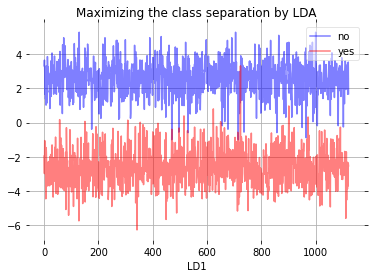

In [ ]:
# plot_step_lda()
plot_scikit_lda(X_train_lda, title='Maximizing the class separation by LDA')

LDA with Logistic Regression and Random Forest

In [ ]:
lrmodel_lda = LogisticRegression()
lrmodel_lda.fit(X_train_lda, y_train)
lrpred_lda = lrmodel_lda.predict(X_train_lda)
lrpred_lda = lrmodel_lda.predict(X_test_lda)
lrpred_prob_lda = lrmodel_lda.predict_proba(X_test_lda)

In [ ]:
accuracy_score(y_test, lrpred_lda)

0.95

In [ ]:
confusion_matrix(y_test,lrpred_lda)

array([[251,  25],
       [ 15, 509]])

In [ ]:
# Let's find the features that were high weight while calculating the LDA vector.
# LDA takes the componenet as minimum of n_classes - 1 and features.

In [ ]:
np.where(lda.coef_ > 20)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([ 88, 202, 203, 213, 226, 287, 288, 295, 316, 322, 332]))

In [ ]:
# All variables are related to the high blood pressure and cholestrol
# LBXRBCSI: Red blood cell count
# `: Insulin
# LBDINLC: Insulin comment code
# LBXIRN: Iron frozen, Serum
# LBDBGELC: Mercury, ethyl comment code
# LBXSC3SI: Bicarbonate 
# LBXSGB: Globulin
# LBXSKSI: Potassium
# LBXSCH: Total Cholesterol, refrigerated serum

In [ ]:
data.columns[np.where(lda.coef_ > 20)[1]]

Index(['DRUG_IRBESARTAN', 'DXDTOFAT', 'URXUMA', 'LBDBCRLC', 'LBXRBCSI',
       'LBDINLC', 'LBXIRN', 'LBDBCDLC', 'LBXSCLSI', 'LBDSGTLC', 'LBXSCH'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()
# rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
accuracy_score(y_test, rfc_pred)

0.91

In [ ]:
confusion_matrix(y_test, rfc_pred)

array([[211,  65],
       [  7, 517]])

In [ ]:
np.where(rfc.feature_importances_ > 0.008)

(array([  2,   6,  15,  97,  98, 100, 103, 131, 146, 194, 199, 201, 291,
        334, 347]),)

In [ ]:
data.columns[np.where(rfc.feature_importances_ > 0.008)]

Index(['RXQSEEN', 'DRUG_AMITRIPTYLINE', 'DRUG_ATENOLOL; CHLORTHALIDONE',
       'DRUG_LINAGLIPTIN; METFORMIN', 'DRUG_LISINOPRIL', 'DRUG_LOVASTATIN',
       'DRUG_METHYLDOPA', 'DRUG_SERTRALINE', 'RIAGENDR', 'BPXPULS', 'LUXSMED',
       'DXDTOBMD', 'LBDTIB', 'LBXSTR', 'BPQ080'],
      dtype='object')

In [ ]:
estimator = rfc.estimators_[0]
estimator

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=33546380, splitter='best')

In [ ]:
from sklearn.tree import export_graphviz

# Export as dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = X.columns,
                class_names = 'Target',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [ ]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

In [ ]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df = df.append({'Model': 'Logistic with LDA', 'Accuracy': accuracy_score(y_test, lrpred_lda)}, ignore_index=True)

## PCA with Logistic Regression and Random Forest

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

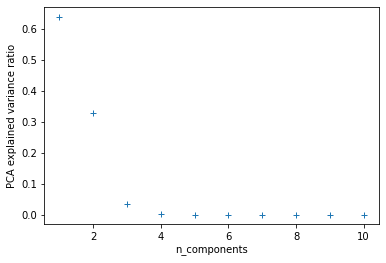

In [ ]:
plt.plot(np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, '+', linewidth=2)
plt.ylabel('PCA explained variance ratio')
plt.xlabel('n_components')
plt.show()

Logistic Regression with PCA with optimal value 5.

In [ ]:
pca = PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lrmodel_pca = LogisticRegression()
lrmodel_pca.fit(X_train_pca, y_train)
lrpred_pca = lrmodel_pca.predict(X_test_pca)
lrpred_prob_pca = lrmodel_pca.predict_proba(X_test_pca)

In [ ]:
df = df.append({'Model': 'Logistic with PCA', 'Accuracy': accuracy_score(y_test, lrpred_pca)}, ignore_index=True)

In [ ]:
accuracy_score(y_test, lrpred_pca)

0.54875

In [ ]:
confusion_matrix(y_test,lrpred_pca)

array([[159, 117],
       [244, 280]])

In [ ]:
print(classification_report(y_test,lrpred_pca))

              precision    recall  f1-score   support

           0       0.39      0.58      0.47       276
           1       0.71      0.53      0.61       524

    accuracy                           0.55       800
   macro avg       0.55      0.56      0.54       800
weighted avg       0.60      0.55      0.56       800



## Area Under ROC Implementation

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, lrpred_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, lrpred_prob_pca[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, lrpred_prob_lda[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, lrpred_prob[:,1])
auc_score2 = roc_auc_score(y_test, lrpred_prob_pca[:,1])
auc_score3 = roc_auc_score(y_test, lrpred_prob_lda[:,1])

print(auc_score1, auc_score2, auc_score3)

0.6869260980196924 0.5673885385551499 0.991716450934838


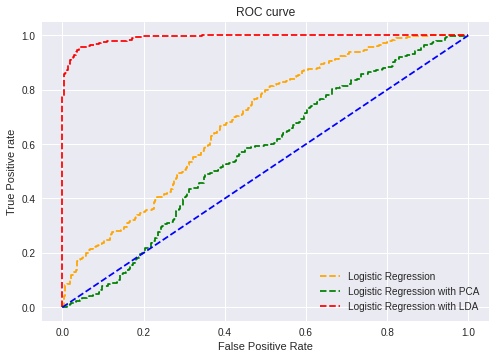

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic Regression with PCA')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Logistic Regression with LDA')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Cross Validation with traditional classification models using LDA, PCA

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def get_score(model, X, y, numFold, modelName, df):
  y_pred = cross_val_predict(model, X, y, cv = numFold)
  finalScore = accuracy_score(y, y_pred)
  df = df.append({'Model':modelName,'Accuracy':finalScore}, ignore_index=True)
  print(modelName)
  print(accuracy_score(y, y_pred))
  print(confusion_matrix(y, y_pred))
  return finalScore, df

In [ ]:
lrScores, df = get_score(LogisticRegression(C=0.01, max_iter=5000), X, y, 5, 'Logistic with CV', df)
ldaLrScores, df = get_score(make_pipeline(LinearDiscriminantAnalysis(),LogisticRegression(C=0.01, max_iter=5000)), X, y, 5, 'Logistic with CV using LDA', df)
pcaLrScores, df = get_score(make_pipeline(PCA(n_components = 5),LogisticRegression(C=0.01, max_iter=5000)), X, y, 5, 'Logistic with CV using PCA', df)

Logistic with CV
0.7391663227404045
[[ 264  513]
 [ 119 1527]]
Logistic with CV using LDA
0.9624432521667354
[[ 706   71]
 [  20 1626]]
Logistic with CV using PCA
0.7172926124638878
[[ 191  586]
 [  99 1547]]


In [ ]:
rfScores, df = get_score(RandomForestClassifier(), X, y, 5, 'Random Forest with CV', df)
ldaRfScores, df = get_score(make_pipeline(LinearDiscriminantAnalysis(),RandomForestClassifier()), X, y, 5, 'Random Forest with CV using LDA', df)
pcaRfScores, df = get_score(make_pipeline(PCA(n_components = 5),RandomForestClassifier()), X, y, 5, 'Random Forest with CV using PCA', df)

Random Forest with CV
0.9385059843169624
[[ 663  114]
 [  35 1611]]
Random Forest with CV using LDA
0.9517127527858027
[[ 720   57]
 [  60 1586]]
Random Forest with CV using PCA
0.6314486174164259
[[ 344  433]
 [ 460 1186]]


In [ ]:
df.sort_values(['Accuracy'])

,Model,Accuracy
3,Logistic with PCA,0.548750
9,Random Forest with CV using PCA,0.631449
1,Logistic with Random Upsampling,0.650000
6,Logistic with CV using PCA,0.717293
0,Logistic with Stratified Sampling,0.723750
4,Logistic with CV,0.739166
7,Random Forest with CV,0.938506
2,Logistic with LDA,0.950000
8,Random Forest with CV using LDA,0.951713
5,Logistic with CV using LDA,0.962443


##Application of Synthetic Minority Oversampling Technique (SMOTE)

To compare the corresponding results with Random upsampling.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import where

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.33, random_state=42)

In [ ]:
counter = Counter(y_train)
print(counter)

Counter({1: 1122, 0: 501})


In [ ]:
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
counter = Counter(y_train_smote)
print(counter)

Counter({1: 1122, 0: 1122})


In [ ]:
lrmodel_smote = LogisticRegression(C = 0.0001)
lrmodel_smote.fit(X_train_smote, y_train_smote)
lrpred_smote = lrmodel_smote.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
accuracy_score(y_test,lrpred_smote)

0.66625

In [ ]:
confusion_matrix(y_test,lrpred_smote)

array([[150, 126],
       [141, 383]])

In [ ]:
rfc_grid_smote = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#############Hyperparameters to be tuned using random search###############

# Number of trees in random forest
n_estimators = [int(x) for x in range(20,100,10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

In [ ]:
rf_random = RandomizedSearchCV(estimator = rfc_grid_smote, param_distributions = random_grid, n_iter = 15, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   29.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rfc_smote = rf_random.predict(X_test)

In [ ]:
accuracy_score(y_test, rfc_smote)

0.92375

In [ ]:
confusion_matrix(y_test, rfc_smote)

array([[224,  52],
       [  9, 515]])